### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

#### Variable definitions

"The independent variable is the variable that is changed or controlled in a scientific experiment to test the effects on the dependent variable."
[source](http://bit.ly/2IsEkaP)

In the Stroop effect experiment, the **independant variable** is the color of the fonts in which the color words are written (this is the variable that is 'changed' in the scientific experiment), and the **dependant variable** is the reaction time recorded for each user between seeing and reading the word (the effects on this time are what we are interested in).
[source](http://bit.ly/2IqBqTP)

Let the **independant variable** be either:
<ul>
<li>`sameCol` for *same* color text and ink</li>
<li>`diffCol` for *different* color text and ink</li>
</ul>

And let the **dependant variable** be either:
<ul>
<li>`congruentTime` for time to see and then read `sameCol`</li>
<li>`incongruentTime` for time to see and then read `diffCol`</li>
</ul>


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

To define the base hypotheses for this question, let's consider (1) the variables, (2) the data and (3) the pertinance of the answer:

<ol>
<li>**the variables:** as defined above, we have `sameCol`, `diffCol`, `congruentTime` and `incongruentTime` variables available, these must be considered in the base hypotheses</li>
<li>**the data:** the data available represent a **sample** of the complete population for this experiment (a group of 24 individuals was selected to take the test, but the complete population size would be the whole English-speaking population of the Earth) and are split between `congruentTime` data (see-read times for the `sameCol` case) and `incongruentTime` data (see-read times for the `diffCOl` case)</li>
<li>**the pertinence of the answer:** we are interested in knowing whether it takes longer to read incongruent data than congruent data, and therefore whether our brains process the information strictly from a semantic perspective or whether visual effects also affect our textual information processing.</li>
</ol>

In order to try and avoid a pre-existing bias, let the null and alternative hypotheses be defined as follows:

#### The null hypothesis $H_0$

*Average population reading times* between 'see' and 'read' will be identical for the incongruent data $\mu_{incongruentTime}$ and for the congruent data $\mu_{congruentTime}$

In other words the **null hypothesis** assumes people take the same amount of time on average to read color words irrespective of the ink used - our brains function on a solely semantic level for reading textual information.

#### The alternative hypothesis $H_1$

*Average population reading times* between 'see' and 'read' will be different for the incongruent data $\mu_{incongruentTime}$ and for the congruent data $\mu_{congruentTime}$

In other words the **alternative hypothesis** assumes people take take more or less time  on average to read color words as a function of the ink used - our brains function on a more complex level to read textual information, and process not only the words written, but also their color.

#### Formally:

$$H_0: \mu_{congruentTime} - \mu_{incongruentTime} = 0$$

$$H_1: \mu_{congruentTime} - \mu_{incongruentTime} \neq 0$$

where $\mu$ is the mean of the population.

#### Statistical test chosen

As discussed above, the data available were provided from a *single group* or *sample* of a larger population, which were asked to perform the *same task* twice with one *variable* changed.

The null hypothesis as defined above assumes there will be no difference between the resulting *average  responses times for the population, based on this sample*.

For these reasons, the **two-sided T-test for repeated samples is selected**. 

**Nota Bene: See discussion of choic of statistial test in 'Statisical Test' section below.**

The [scipy.stats.ttest_rel](http://bit.ly/2IziBy6) function will be used to perform the analysis.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [10]:
# import libraries
import pandas as pd
import numpy as np
#import math
import statistics as stats
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import scipy.stats as scistats

In [11]:
# import data
df_raw = pd.read_csv('./stroopdata.csv')

In [12]:
# check data
df_raw.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [14]:
df_raw.nunique()

Congruent      24
Incongruent    24
dtype: int64

In [15]:
df_raw[df_raw.isnull() == True].count()

Congruent      0
Incongruent    0
dtype: int64

In [26]:
# descriptive statistics of congruent data
# length, min, max
len_congruent = len(df_raw['Congruent'])
min_congruent = min(df_raw['Congruent'])
max_congruent = max(df_raw['Congruent'])
# measures of central tendency
# mean (average of values), median (middle of sorted list)
mean_congruent = np.mean(df_raw['Congruent'])
median_congruent = stats.median(df_raw['Congruent'])
# measures of variabilty
# range
range_congruent = max_congruent - min_congruent
# percentiles
first_percentile_congruent = np.percentile(df_raw['Congruent'], 25)
second_percentile_congruent = np.percentile(df_raw['Congruent'], 50)
third_percentile_congruent = np.percentile(df_raw['Congruent'], 75)
# inter-quartile-range (IQR)
IQR_congruent = third_percentile_congruent - first_percentile_congruent
# variance and std
variance_sample_congruent = np.var(df_raw['Congruent'], ddof=1)
std_sample_congruent = np.std(df_raw['Congruent'], ddof=1)
# estimated standard error of the mean
std_error_congruent = df_raw['Congruent'].sem(ddof=1)
# output list of results
congruent_stats = [len_congruent, min_congruent, max_congruent
                   , mean_congruent, median_congruent, range_congruent
                   , first_percentile_congruent, second_percentile_congruent
                   , third_percentile_congruent, IQR_congruent
                   , variance_sample_congruent, std_sample_congruent, std_error_congruent]

In [27]:
# descriptive statistics of incongruent data
# length, min, max
len_incongruent = len(df_raw['Incongruent'])
min_incongruent = min(df_raw['Incongruent'])
max_incongruent = max(df_raw['Incongruent'])
# measures of central tendency
# mean (average of values), median (middle of sorted list)
mean_incongruent = np.mean(df_raw['Incongruent'])
median_incongruent = stats.median(df_raw['Incongruent'])
# measures of variabilty
# range
range_incongruent = max_incongruent - min_incongruent
# percentiles
first_percentile_incongruent = np.percentile(df_raw['Incongruent'], 25)
second_percentile_incongruent = np.percentile(df_raw['Incongruent'], 50)
third_percentile_incongruent = np.percentile(df_raw['Incongruent'], 75)
# inter-quartile-range (IQR)
IQR_incongruent = third_percentile_incongruent - first_percentile_incongruent
# variance and std
variance_sample_incongruent = np.var(df_raw['Incongruent'], ddof=1)
std_sample_incongruent = np.std(df_raw['Incongruent'], ddof=1)
# estimated standard error of the mean
std_error_incongruent = df_raw['Incongruent'].sem(ddof=1)
# output list of results
incongruent_stats = [len_incongruent, min_incongruent, max_incongruent
                   , mean_incongruent, median_incongruent, range_incongruent
                   , first_percentile_incongruent, second_percentile_incongruent
                   , third_percentile_incongruent, IQR_incongruent
                   , variance_sample_incongruent, std_sample_incongruent,std_error_incongruent]

In [28]:
# descriptive statistics summary table
columns = ['Congruent', 'Incongruent']
descriptive_stats_dict = {columns[0]: congruent_stats, columns[1]: incongruent_stats}
descriptive_stats_index = ['length', 'min', 'max', 'mean', 'median', 'range'
                           , 'first_percentile', 'second_percentile', 'third_percentile'
                           , 'IQR', 'variance_sample', 'std_sample', 'std_error']
df_descriptive_stats = pd.DataFrame(descriptive_stats_dict, index=descriptive_stats_index)
df_descriptive_stats

,Congruent,Incongruent
length,24.000000,24.000000
min,8.630000,15.687000
max,22.328000,35.255000
mean,14.051125,22.015917
median,14.356500,21.017500
range,13.698000,19.568000
first_percentile,11.895250,18.716750
second_percentile,14.356500,21.017500
third_percentile,16.200750,24.051500
IQR,4.305500,5.334750


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [29]:
# Simulate normal distribution from mean and standard deviations calculated from data then compare to real data
mu_congruent, sigma_congruent = mean_congruent, std_sample_congruent
mu_incongruent, sigma_incongruent = mean_incongruent, std_sample_incongruent
simulated_congruent = np.random.normal(mu_congruent, sigma_congruent, 1000)
simulated_incongruent = np.random.normal(mu_incongruent, sigma_incongruent, 1000)

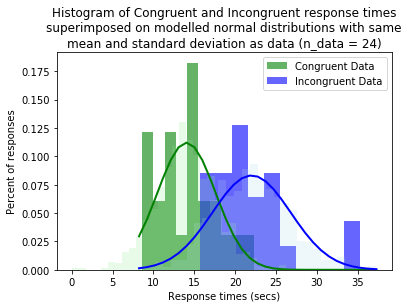

In [30]:
# using matplotlib
# plot histograms of raw data
plt.hist(df_raw['Congruent'], density=True, alpha=0.6, color='g', label="Congruent Data")
plt.hist(df_raw['Incongruent'], density=True, alpha=0.6, color='b', label="Incongruent Data")
# add title, labels and legend
plt.title('Histogram of Congruent and Incongruent response times\nsuperimposed on modelled normal distributions with same\nmean and standard deviation as data (n_data = 24)')
plt.xlabel('Response times (secs)')
plt.ylabel('Percent of responses')
plt.legend()
# plot histogram of simulated normal distribution and display in pale color
count, bins, ignored = plt.hist(simulated_congruent, 30, normed=True, alpha=0.2, color='lightgreen')
count, bins, ignored = plt.hist(simulated_incongruent, 30, normed=True, alpha=0.2, color='lightblue')
# plot simulated probability density function for each distribution
plt.plot(bins, 1/(sigma_congruent * np.sqrt(2 * np.pi)) 
         * np.exp( - (bins - mu_congruent)**2 / (2 * sigma_congruent**2) )
         ,linewidth=2, color='g')
plt.plot(bins, 1/(sigma_incongruent * np.sqrt(2 * np.pi)) 
         * np.exp( - (bins - mu_incongruent)**2 / (2 * sigma_incongruent**2) )
         ,linewidth=2, color='b')
plt.show();

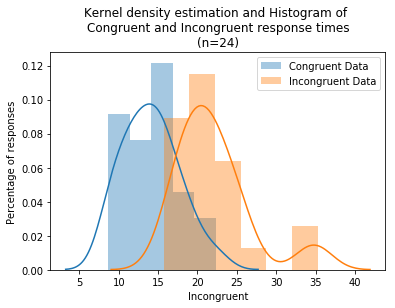

In [31]:
# using seaborn
plt.title('Kernel density estimation and Histogram of \nCongruent and Incongruent response times\n(n=24)')
plt.xlabel('Response times (secs)')
plt.ylabel('Percentage of responses')
sns.distplot(df_raw['Congruent'], label='Congruent Data')
sns.distplot(df_raw['Incongruent'], label='Incongruent Data')
plt.legend()
plt.show()

#### Comments about visualizations

First it should be noted that **no conclusions** are drawn from the visualizations, conclusions **will only be drawn from the statistical tests shown below.**

It can however be noted that distributions of response times for both `Congruent` and `Incongruent` data show a close-to normal distribution (the `Incongruent` dataset shows a possible bimodal distribution in the KDE plot but this is only based on 2 user responses).

It must however be noted that only 24 data points are available.

Interestingly, the `Incongruent` data are shifted to the right on the x-axis (Response time (secs)) relative to the `Congruent` data, this is also seen of course in the 'descriptive statistics summary table' (`df_descriptive_stats`) by comparing the `mean` or `median` values for both columns for example.

#### Comments about population properties

Because:

<ol>
<li>we do not know the size of the population</li>
<li>we do not know the average reading time for the population for congruent nor incongruent data</li>
<li>we only have access to a sample where n=24</li>
</ol>

We are limited in in our estimates of population data, we can however calculate the estimated **standard error of the mean**

$$SE = S/\sqrt{n}$$

where `SE` is the standard error of the mean,  `S` is the standard error of the sample and `n` is the size of the sample ([source](http://bit.ly/2Lea05s))

The values are reported above in `df_descriptive_stats`

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### Statistical test

Let us state the *assumptions* made that lead to choosing the statistical test [source](http://bit.ly/2LiUNQU):

<ol>
<li>Interval or ratio scale of measurement (approximately interval)</li>
<li>Random sampling from a defined population</li>
<li>Samples or sets of data used to produce the difference scores are linked in the population through repeated measurement, natural association, or matching</li>
<li>Scores are normally distributed in the population; difference scores are normally distributed</li>
</ol>

Note that if point 3. above was *not assumed* and if point 4. above was instead "Characteristic is normally distributed in the population", we could have chosen a One sample z-test or a One sample t-test.

However in this experiment, we indeed have the following:

<ol>
<li>measured data are time intervals</li>
<li>the test subjects are assumed to be randomly selected</li>
<li>repeated measurements under different conditions were conducted to produce the sets of data</li>
<li>interval times are <i>assumed</i> to be normally distributed in the population</li>
</ol>

Because we are comparing two datasets coming from a single sample of a larger population and are interested in knowing whether the sample average of one sample is significantly different from that of the other, and because the available data show a close-to-normal sampling distribution, I choose to apply the **Two sample t-test** to decide whether the null hypothesis is rejected or fails to be rejected at a **confidence level of 5%**.

##### Nota Bene

The sample size is *small*: n = 24 and therefore the results of the analysis can in *any case* not be conclusive. Additionally this statistical test assumes a normal distribution for the data, and with such a small sample size, no definitive conclusions can be drawn about the sample distribution function.

Therefore to be conclusive, while the same techniques could be used, a larger sample size would be required.

In [25]:
# Using scipy scipy.stats.ttest_rel to test the data
scistats.ttest_rel(df_raw['Congruent'], df_raw['Incongruent'], axis=0)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

The p-value observed is small (~4.1e-8), for a threshold of 5% or 0.05 as defined above, this means that ***"we reject the null hypothesis of equal averages"***.

This is **consistent** with the data shown in the descriptive statistics section both in `df_descriptive_stats` and in the two visualizations provided above.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

While I cannot comment definitively about the biological implications of these observations on the basis of this study, it is interesting to note that the 'feeling' we have when we try to read color names written in a different color ink - namely that slight feeling of stress mixed with focussed concentration - has a *measurable effect* on the time it takes us to read these words, and allows us to imagine that indeed our brains are not simply 'reading' the words, but rather are using a multitude of inputs to 'say' the *concept* that is described by those colored lines on a piece of paper.

Without having done any research on the topic, we could postulate that a similar effect might be observed where the following conditions are met:

<ol>
<li>we use one sense to decipher a concept</li>
<li>there are multiple signals that can be captured by that one sense</li>
<li>the signals can be congruent or incongruent</li>
<li>our brains then process the information one multiple levels</li>
<li>we then express the concept using another sense or ability</li>
</ol>

Some examples of such conditions might be:

<ul>
<li>we hear music while listening to someone speak, and must then repeat keywords in order from the conversation, then repeat the same excercise with no music</li>
<li>we touch a familiar substance with our eyes masked and in very cold temperature conditions, and must guess what the substance is, then repeat the same at normal temperatures</li>
<li>we taste a familiar food after having eaten extremely spicy food and must identify it from taste alone, then repeat the same without having eaten spicy foods</li>
</ul>

In essence, I would expect this effect to be observable any time our brain is used to interpreting a stimulus based on one or more senses, and the same interpretation is attempted either with a sense impaired, or with an overstimulation of one of the senses used for the interpration.

It would be interesting to repeat the same experience while overloading *another* sense that is *not* used in the interpretation, for example repeating the same colored words and colored ink experiment with a strong stimulus of another sense that sight.

### References

<ul>
<li>[pandas](http://pandas.pydata.org/pandas-docs/stable/)</li>
<li>[NumPy](http://www.numpy.org/)</li>
<li>[SciPy](https://scipy.org/)</li>
<li>[anaconda](https://www.anaconda.com/)</li>
<li>[jupyter notebooks](http://jupyter.org/)</li>
<li>[seaborn](https://seaborn.pydata.org/)</li>
<li>[Visualization with Seaborn](http://bit.ly/2rRgzmH)</li>
<li>[stackoverflow](https://stackoverflow.com/)</li>
<li>[numpy.random.normal](http://bit.ly/2IxIfTX)</li>
<li>[scipy.stats.ttest_rel](http://bit.ly/2IziBy6)</li>
<li>I also gratefully acknowledge the useful and constructive feedback received from an anyonymous Udacity reviewer for my first submission of this project.</li>
<li>[psychology.emory.edu](http://bit.ly/2LiUNQU)</li>
<li>[stat.wmich.edu](http://bit.ly/2Lea05s)</li>
<li>I also gratefully acknowledge the useful and constructive feedback received from an anyonymous Udacity reviewer for my second submission of this project.</li>
<li hidden>[]()</li>
</ul>